In [1]:
import pandas as pd
import numpy as np
file_path = ('BankNoteAuthentication.csv')
data = pd.read_csv(file_path)

In [2]:
data.head()


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
print(data.shape)

(1372, 5)


In [4]:
data.isnull()

,variance,skewness,curtosis,entropy,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1367,False,False,False,False,False
1368,False,False,False,False,False
1369,False,False,False,False,False
1370,False,False,False,False,False


In [5]:
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #Veriyi 0 ve 1 arasına sıkıştırmak için
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score


In [6]:
import pandas as pd
df = pd.read_csv("BankNoteAuthentication.csv")
# Bağımsız değişkenler (X) ve bağımlı değişken (y) ayır
X = df.iloc[:, :-1]  # Son sütun hariç tüm sütunları al (features)
y = df.iloc[:, -1]   # Son sütunu al (class)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Eğitim setine uygula
X_test_scaled = scaler.transform(X_test)  # Test setini dönüştür


In [9]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

In [10]:
print(X_train_scaled_df.head())

   variance  skewness  curtosis   entropy
0 -0.639156  1.805580 -0.188365 -3.050968
1  0.821889  0.852399 -0.594078  0.603455
2 -1.657033 -1.633283  2.383862 -0.342355
3  1.728861  0.328631 -0.748077  1.084449
4  0.113973  0.205992  0.325092  0.534656


In [11]:
# Modeli tanımla ve eğit
log_reg = LogisticRegression()
start_time = time.time()  # Zaman ölçümü için başlangıç
log_reg.fit(X_train_scaled, y_train)  # Modeli eğit
train_time = time.time() - start_time  # Eğitim süresini hesapla

In [12]:

start_time = time.time()
y_pred = log_reg.predict(X_test_scaled)
predict_time = time.time() - start_time

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [13]:
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print(f"Eğitim süresi: {train_time:.4f} saniye")
print(f"Tahmin süresi: {predict_time:.4f} saniye")
print("Confusion Matrix:")
print(conf_matrix)

Logistic Regression Accuracy: 0.9782
Eğitim süresi: 0.0044 saniye
Tahmin süresi: 0.0005 saniye
Confusion Matrix:
[[144   4]
 [  2 125]]


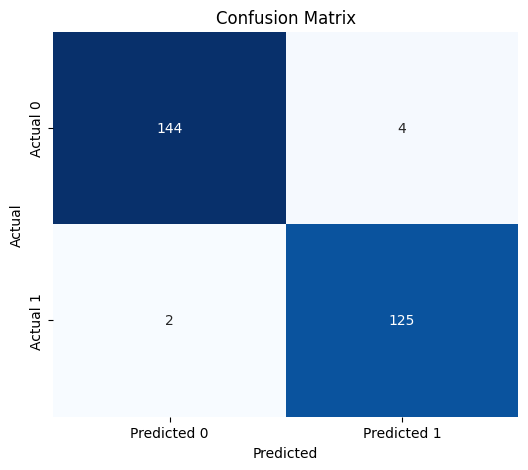

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])

# Adding labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_normal = precision_score(y_test, y_pred)
recall_normal = recall_score(y_test, y_pred)
f1_normal = f1_score(y_test, y_pred)
print("\nNormal Model Performansı:")
print(f"Precision: {precision_normal:.4f}")
print(f"Recall: {recall_normal:.4f}")
print(f"F1-Score: {f1_normal:.4f}")



Normal Model Performansı:
Precision: 0.9690
Recall: 0.9843
F1-Score: 0.9766
